# Application to Bioproduct-Types Submodel, version 9

## Set up packages.

In [1]:
require(abind)
require(data.table)
require(deSolve)
require(LaplacesDemon)
require(magrittr)
require(np)
require(rTensor)

require(ggplot2)
require(GGally)

Loading required package: abind
Loading required package: data.table
Loading required package: deSolve
Loading required package: LaplacesDemon
Loading required package: magrittr
Loading required package: np
Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-9)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]
Loading required package: rTensor
Loading required package: ggplot2
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


## Read results.

In [2]:
xs = fread("framework/xs-v9.tsv")
xs %>% dim

[1] 21347    18

In [3]:
xs[!is.na(s)] %>% dim

[1] 7601   18

In [4]:
ys = fread("framework/ys-v9.tsv")
ys %>% summary

    sequence          Year         Adopters         NonAdopters      
 Min.   :    1   Min.   :2015   Min.   :     0.0   Min.   :     0.0  
 1st Qu.: 4805   1st Qu.:2022   1st Qu.:   800.3   1st Qu.:   158.2  
 Median :10124   Median :2032   Median :  7799.3   Median : 62099.5  
 Mean   :10275   Mean   :2032   Mean   : 38534.1   Mean   : 51377.2  
 3rd Qu.:15648   3rd Qu.:2042   3rd Qu.:101244.0   3rd Qu.: 95802.8  
 Max.   :21319   Max.   :2050   Max.   :103500.0   Max.   :102720.0  
 Potential Adopters 
 Min.   :     0.00  
 1st Qu.:    46.54  
 Median :  2251.11  
 Mean   : 11838.63  
 3rd Qu.: 16766.80  
 Max.   :100003.00  

In [5]:
xys = merge(xs, ys, by="sequence")[, .(
    `sequence`,
    `bioproduct actual cost`,
    `consumer inertia`,
    `retrofit delay`,
    `Year`,
    `NonAdopters`,
    `Potential Adopters`,
    `Adopters`
)]

## Plot sampling pattern.

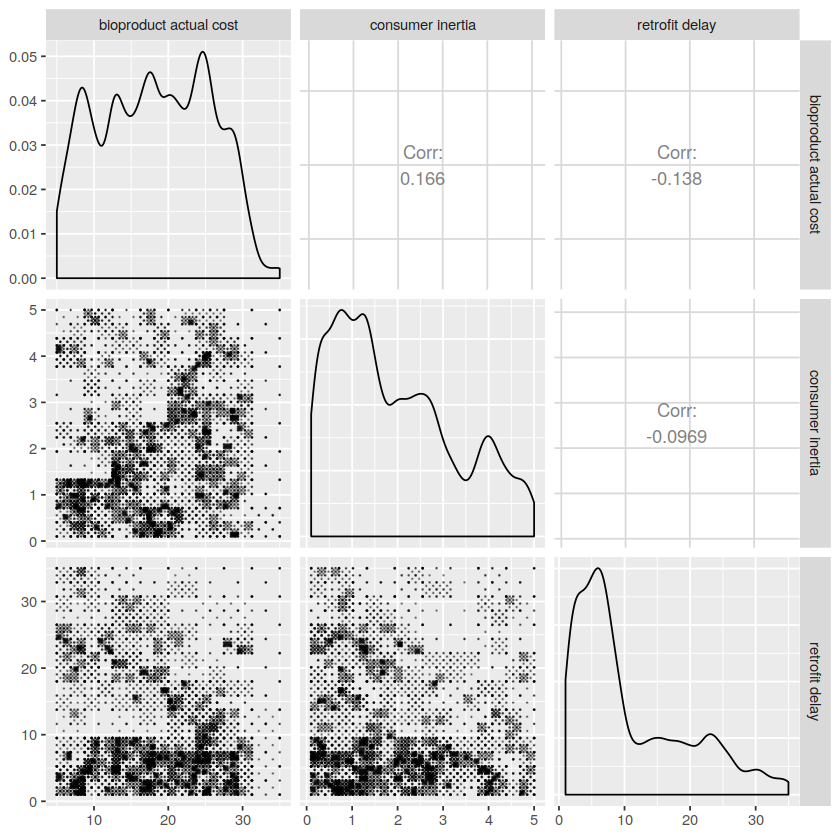

In [6]:
ggpairs(
    xs,
    16:18,
#   mapping = aes(color=!probed),
    lower = list(continuous = wrap("points", alpha = 0.2, size=0.1))
)

### List modes of marginal distributions of sampling pattern.

#### Bioproduct actual cost.

In [7]:
Modes(xs[!is.na(s), `bioproduct actual cost`])$modes

[1] 24.756568 17.603834  8.376807 13.598303

#### Consumer inertia.

In [8]:
Modes(xs[!is.na(s), `consumer inertia`])$modes

[1] 0.8382429 2.2696774 4.0231847

#### Retrofit delay.

In [9]:
Modes(xs[!is.na(s), `retrofit delay`])$modes

[1]  5.86379 15.34393 23.43473

## Plot distribution of nonlinearity measure.

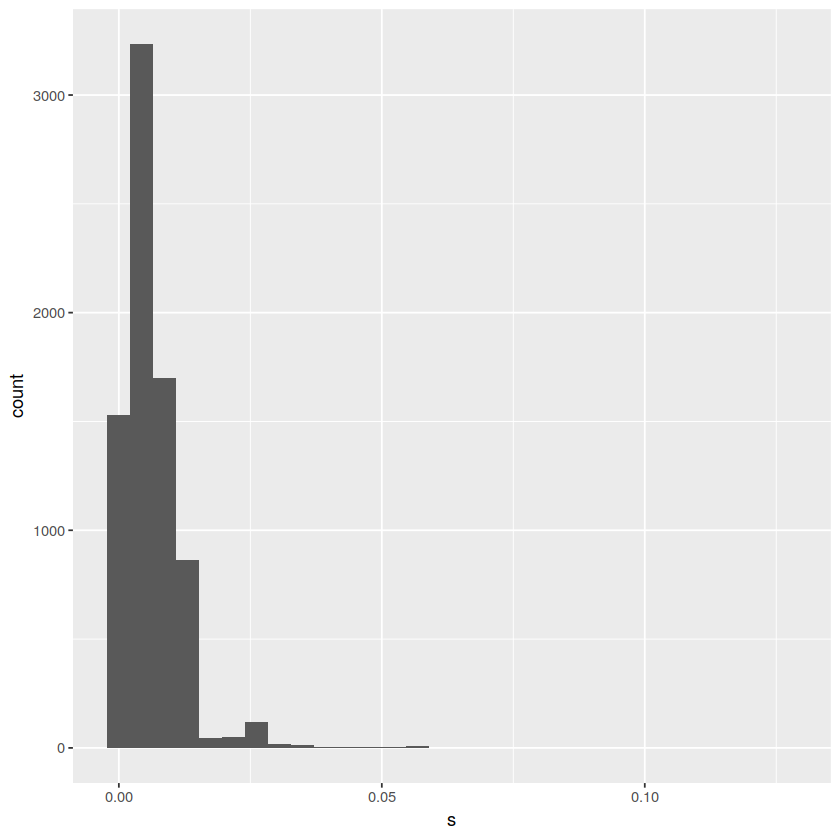

In [10]:
ggplot(xs[!is.na(s)], aes(x=s)) + geom_histogram(bins=30)

## Plot response variables.

### As a function of bioproduct actual cost.

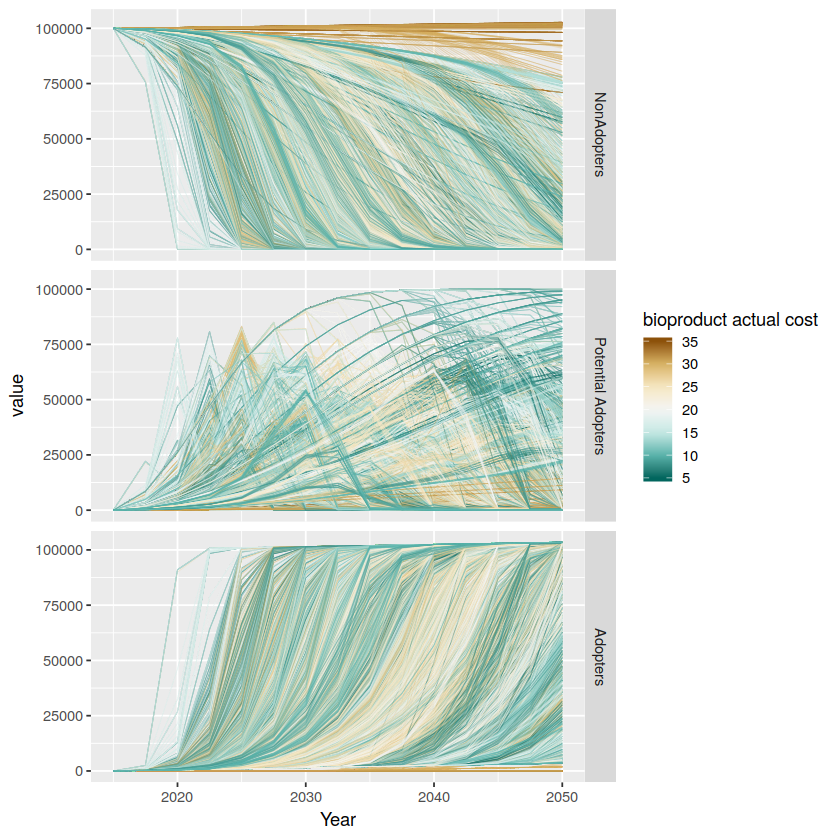

In [11]:
ggplot(
    melt(xys, id.vars=c("sequence", "Year", "bioproduct actual cost", "consumer inertia", "retrofit delay")),
    aes(x=Year, y=value, group=sequence, color=`bioproduct actual cost`)) +
geom_line(alpha=0.25, size=0.25) +
scale_color_distiller(type="div") +
facet_grid(variable ~ .)

### As a function of consumer inertia.

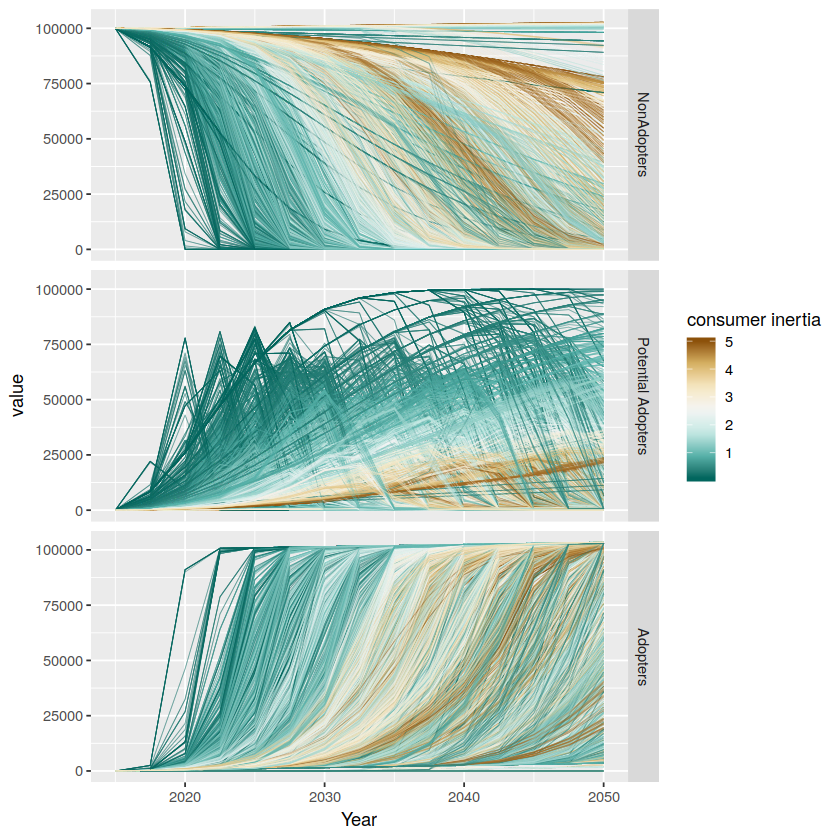

In [12]:
ggplot(
    melt(xys, id.vars=c("sequence", "Year", "bioproduct actual cost", "consumer inertia", "retrofit delay")),
    aes(x=Year, y=value, group=sequence, color=`consumer inertia`)) +
geom_line(alpha=0.25, size=0.25) +
scale_color_distiller(type="div") +
facet_grid(variable ~ .)

### As a function of retrofit delay.

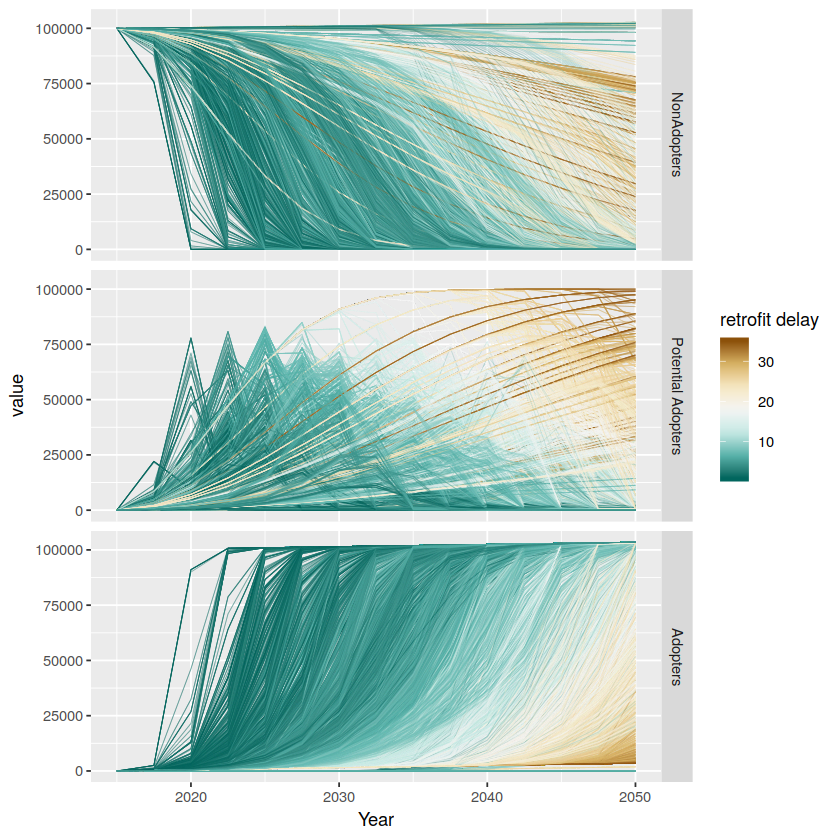

In [13]:
ggplot(
    melt(xys, id.vars=c("sequence", "Year", "bioproduct actual cost", "consumer inertia", "retrofit delay")),
    aes(x=Year, y=value, group=sequence, color=`retrofit delay`)) +
geom_line(alpha=0.25, size=0.25) +
scale_color_distiller(type="div") +
facet_grid(variable ~ .)

### Distribution of output at final year.

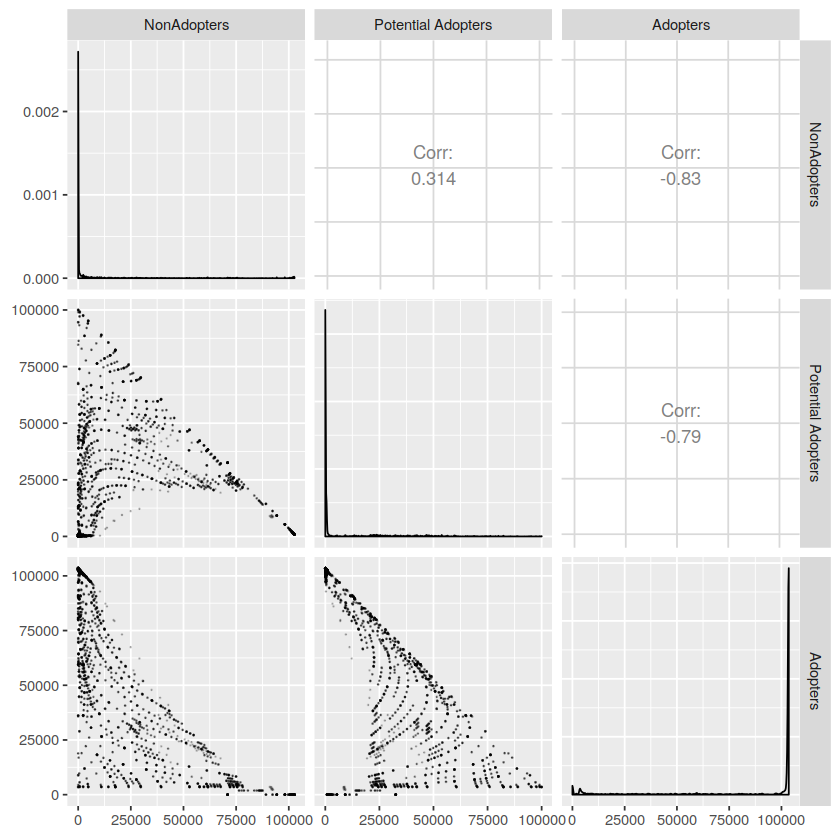

In [14]:
ggpairs(
    xys[Year == 2050],
    6:8,
#   mapping = aes(color=!probed),
    lower = list(continuous = wrap("points", alpha = 0.2, size=0.1))
)